In [ ]:
import joblib
import re
import whois
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

INFO:numexpr.utils:NumExpr defaulting to 12 threads.


In [2]:
# Load dataset
df = pd.read_csv('final_url_dataset.csv')

In [3]:
df.head()

,url,type
0,https://web.archive.org/web/20210308153139/htt...,Benign
1,NaN,benign
2,https://web.archive.org/web/20240121015553/htt...,benign
3,https://tg.wikipedia.org/wiki/%D0%9D%D0%B0%D1%...,benign
4,https://web.archive.org/web/20220329160506/htt...,benign


In [4]:
df.tail()

,url,type
177811,76c4523a0b36bd2b813acc3873765c9bd9d6bbc9,defacement
177812,07e9de645cd50443965e4feb991f79b3ddc9d36e,defacement
177813,dcffb37867094313f043cf754c3e2ce7b0851fdd,defacement
177814,f5572fa071aec4014eebefe1c5df41aad90fec84,defacement
177815,6dec89d45ea68f26c3a8c52b7a42b08e0e9a9035,defacement


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177816 entries, 0 to 177815
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     177815 non-null  object
 1   type    177816 non-null  object
dtypes: object(2)
memory usage: 2.7+ MB


In [6]:
df.columns

Index(['url', 'type'], dtype='object')

In [7]:
df.describe()

,url,type
count,177815,177816
unique,155950,5
top,http://46.19.143.10/bins/zxc.sh,malware
freq,4,152089


In [8]:
df.shape

(177816, 2)

In [9]:
df.dropna(inplace=True)

In [10]:
df.head()

,url,type
0,https://web.archive.org/web/20210308153139/htt...,Benign
2,https://web.archive.org/web/20240121015553/htt...,benign
3,https://tg.wikipedia.org/wiki/%D0%9D%D0%B0%D1%...,benign
4,https://web.archive.org/web/20220329160506/htt...,benign
5,https://www.xe.com/currencyconverter/convert/?...,benign


In [11]:
df.shape

(177815, 2)

In [12]:
df['type'] = df['type'].str.strip().str.lower()
print(df['type'].unique())

['benign' 'phishing' 'defacement' 'malware']


In [13]:
label_mapping = {'benign': 0, 'defacement': 1, 'phishing': 2, 'malware': 3}
df['type'] = df['type'].map(label_mapping)
df.dropna(inplace=True)

In [14]:
df.head()

,url,type
0,https://web.archive.org/web/20210308153139/htt...,0
2,https://web.archive.org/web/20240121015553/htt...,0
3,https://tg.wikipedia.org/wiki/%D0%9D%D0%B0%D1%...,0
4,https://web.archive.org/web/20220329160506/htt...,0
5,https://www.xe.com/currencyconverter/convert/?...,0


In [15]:
# Function to extract features from a URL
def extract_features(url):
    features = [
        len(url),  # URL length
        url.count('.'),  # Count of '.'
        url.count('-'),  # Count of '-'
        url.count('@'),  # Count of '@'
        url.count('?'),  # Count of '?'
        url.count('='),  # Count of '='
        1 if url.startswith("https") else 0,  # HTTPS presence (1 if exists)
        1 if url.startswith("http") else 0,  # HTTP presence (1 if exists)
        1 if "www." in url else 0,  # WWW presence (1 if exists)
        1 if re.search(r'\d+', url) else 0,  # Numeric presence (1 if any digit exists)
        sum(c.isdigit() for c in url),  # Count of digits
        sum(c.isalpha() for c in url),  # Count of alphabets
        url.count('/'),  # Count of '/'
        url.count('%'),  # Count of '%'
        url.count('&'),  # Count of '&'
        url.count(';'),  # Count of ';'
        url.count('_'),  # Count of '_'
        url.count(':'),  # Count of ':'
        url.count('!'),  # Count of '!'
        url.count('*'),  # Count of '*'
        url.count(','),  # Count of ','
        url.count('$'),  # Count of '$'
        url.count('~')   # Count of '~'
    ]
    return features

In [16]:
# Extract features
df['features'] = df['url'].apply(lambda x: extract_features(x))
X = np.array(df['features'].tolist())
y = df['type'].values

In [17]:
X

array([[104,   5,   0, ...,   0,   0,   0],
       [134,   4,   9, ...,   0,   0,   0],
       [121,   2,   0, ...,   0,   0,   0],
       ...,
       [ 40,   0,   0, ...,   0,   0,   0],
       [ 40,   0,   0, ...,   0,   0,   0],
       [ 40,   0,   0, ...,   0,   0,   0]])

In [18]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [19]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Random Forest Classifier

In [20]:
# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
y_pred = rfc.predict(X_test)

In [22]:
y_pred

array([3, 3, 3, ..., 3, 3, 0], dtype=int64)

In [23]:
print(f"Random Forest Algorithm Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print(classification_report(y_test, y_pred))

Random Forest Algorithm Accuracy: 88.32%
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1482
           1       0.18      0.05      0.08      1776
           2       0.17      0.05      0.08      1887
           3       0.90      0.98      0.94     30418

    accuracy                           0.88     35563
   macro avg       0.55      0.51      0.51     35563
weighted avg       0.83      0.88      0.85     35563



In [24]:
# Save the model
joblib.dump(rfc, 'rfc_malicious_url_model.pkl')

['rfc_malicious_url_model.pkl']

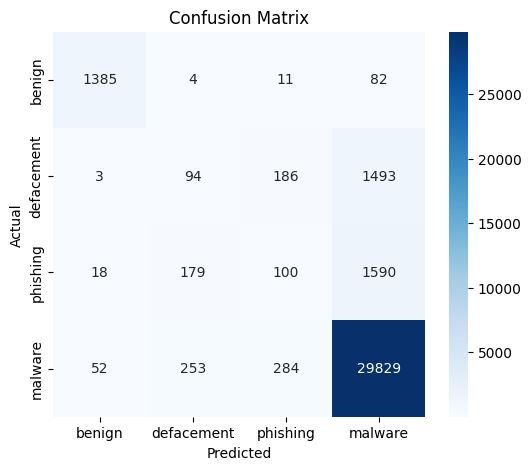

In [25]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Naive Based Algorithm

In [26]:
nbc = GaussianNB()
nbc.fit(X_train, y_train)

GaussianNB()

In [27]:
y_pred = nbc.predict(X_test)

In [28]:
y_pred

array([3, 3, 3, ..., 1, 1, 0], dtype=int64)

In [29]:
print(f"Naive Based Algorithm Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print(classification_report(y_test, y_pred))

Naive Based Algorithm Accuracy: 86.01%
              precision    recall  f1-score   support

           0       0.56      0.58      0.57      1482
           1       0.30      0.22      0.25      1776
           2       0.28      0.00      0.01      1887
           3       0.90      0.96      0.93     30418

    accuracy                           0.86     35563
   macro avg       0.51      0.44      0.44     35563
weighted avg       0.82      0.86      0.83     35563



In [30]:
# Save the model
joblib.dump(nbc, 'nbc_malicious_url_model.pkl')

['nbc_malicious_url_model.pkl']

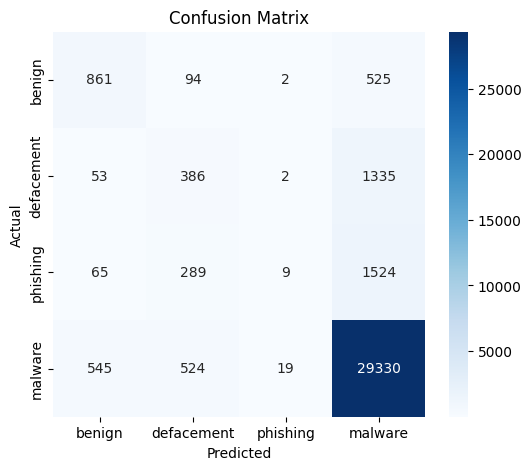

In [31]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# AdaBoost Classifier

In [32]:
abc = AdaBoostClassifier(n_estimators=100, random_state=42)
abc.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [33]:
y_pred = abc.predict(X_test)

In [34]:
y_pred

array([3, 3, 3, ..., 3, 3, 0], dtype=int64)

In [35]:
print(f"AdaBoost Classifier Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print(classification_report(y_test, y_pred))

AdaBoost Classifier Accuracy: 87.90%
              precision    recall  f1-score   support

           0       0.80      0.62      0.70      1482
           1       0.89      0.05      0.09      1776
           2       0.00      0.00      0.00      1887
           3       0.88      0.99      0.93     30418

    accuracy                           0.88     35563
   macro avg       0.64      0.41      0.43     35563
weighted avg       0.83      0.88      0.83     35563



In [36]:
# Save the model
joblib.dump(abc, 'abc_malicious_url_model.pkl')

['abc_malicious_url_model.pkl']

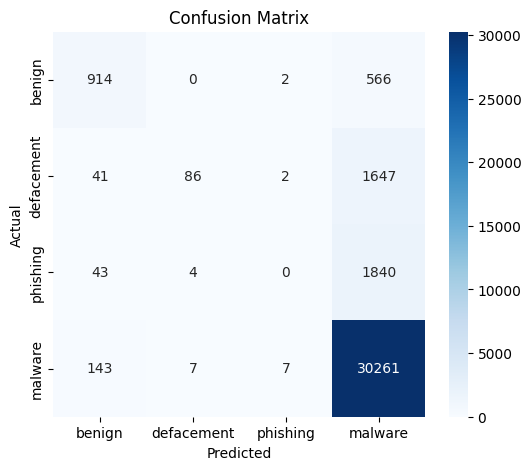

In [37]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Testing

In [38]:
safety_thresholds = {
    'URL Length': (5, 75),
    'Dot Count': (3, 7),
    'Dash Count': (0, 2),
    'At Symbol': (0, 0),
    'Question Mark': (0, 2),
    'Equals Sign': (0, 3),
    'HTTPS Presence': (1, 1),  # 1 means safe (https present)
    'HTTP Presence': (0, 0),  # 0 means safe (http not present)
    'WWW Presence': (0, 1),
    'Numeric Presence': (0, 1),
    'Digit Count': (0, 10),
    'Alphabet Count': (10, 100),
    'Slash Count': (1, 5),
    'Percent Count': (0, 2),
    'Ampersand Count': (0, 2),
    'Semicolon Count': (0, 1),
    'Underscore Count': (0, 3),
    'Colon Count': (0, 2),
    'Exclamation Mark': (0, 1),
    'Asterisk': (0, 1),
    'Comma': (0, 2),
    'Dollar Sign': (0, 1),
    'Tilde': (0, 1)
}

In [39]:
# Function to analyze feature safety
def analyze_feature_safety(features):
    safety_analysis = {}
    feature_names = list(safety_thresholds.keys())
    
    for i, feature in enumerate(feature_names):
        min_val, max_val = safety_thresholds[feature]
        status = "Safe" if min_val <= features[i] <= max_val else "Harmful"
        safety_analysis[feature] = {"count": features[i], "status": status}
    
    return safety_analysis

In [40]:
# Load the trained model
clf = joblib.load('rfc_malicious_url_model.pkl')  # Default model
label_mapping = {0: 'Benign', 1: 'Defacement', 2: 'Phishing', 3: 'Malware'}
feature_names = list(safety_thresholds.keys())

In [44]:
# Example usage
url_to_check = "https://chatgpt.com/c/67c7e26a-8bb0-8010-b20c-001eee124de4"
features = extract_features(url_to_check)
print(features)
predicted_class = clf.predict([features])[0]
print(predicted_class)
prediction_label = label_mapping[predicted_class]
print(prediction_label)
feature_safety = analyze_feature_safety(features)

[58, 1, 4, 0, 0, 0, 1, 1, 0, 1, 20, 28, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
0
Benign


In [45]:
print(feature_safety)

{'URL Length': {'count': 58, 'status': 'Safe'}, 'Dot Count': {'count': 1, 'status': 'Harmful'}, 'Dash Count': {'count': 4, 'status': 'Harmful'}, 'At Symbol': {'count': 0, 'status': 'Safe'}, 'Question Mark': {'count': 0, 'status': 'Safe'}, 'Equals Sign': {'count': 0, 'status': 'Safe'}, 'HTTPS Presence': {'count': 1, 'status': 'Safe'}, 'HTTP Presence': {'count': 1, 'status': 'Harmful'}, 'WWW Presence': {'count': 0, 'status': 'Safe'}, 'Numeric Presence': {'count': 1, 'status': 'Safe'}, 'Digit Count': {'count': 20, 'status': 'Harmful'}, 'Alphabet Count': {'count': 28, 'status': 'Safe'}, 'Slash Count': {'count': 4, 'status': 'Safe'}, 'Percent Count': {'count': 0, 'status': 'Safe'}, 'Ampersand Count': {'count': 0, 'status': 'Safe'}, 'Semicolon Count': {'count': 0, 'status': 'Safe'}, 'Underscore Count': {'count': 0, 'status': 'Safe'}, 'Colon Count': {'count': 1, 'status': 'Safe'}, 'Exclamation Mark': {'count': 0, 'status': 'Safe'}, 'Asterisk': {'count': 0, 'status': 'Safe'}, 'Comma': {'count'

In [46]:
# Convert the feature_safety dictionary to a DataFrame
feature_safety_df = pd.DataFrame.from_dict(feature_safety, orient='index')
feature_safety_df.reset_index(inplace=True)
feature_safety_df.columns = ['Feature', 'Count', 'Status']
print(feature_safety_df)
print('-'*40)
print(f"Predicted Class: {prediction_label}")

             Feature  Count   Status
0         URL Length     58     Safe
1          Dot Count      1  Harmful
2         Dash Count      4  Harmful
3          At Symbol      0     Safe
4      Question Mark      0     Safe
5        Equals Sign      0     Safe
6     HTTPS Presence      1     Safe
7      HTTP Presence      1  Harmful
8       WWW Presence      0     Safe
9   Numeric Presence      1     Safe
10       Digit Count     20  Harmful
11    Alphabet Count     28     Safe
12       Slash Count      4     Safe
13     Percent Count      0     Safe
14   Ampersand Count      0     Safe
15   Semicolon Count      0     Safe
16  Underscore Count      0     Safe
17       Colon Count      1     Safe
18  Exclamation Mark      0     Safe
19          Asterisk      0     Safe
20             Comma      0     Safe
21       Dollar Sign      0     Safe
22             Tilde      0     Safe
----------------------------------------
Predicted Class: Benign
